  (0, 4)	2.5
  (0, 7)	2.5
  (1, 0)	2.5
  (1, 6)	2.5
  (2, 3)	2.5
  (2, 9)	2.5
  (3, 1)	2.5
  (3, 8)	2.5
  (4, 2)	2.5
  (4, 5)	2.5


/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


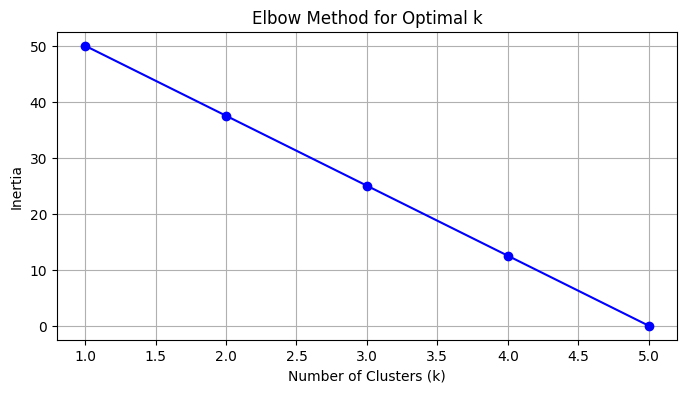

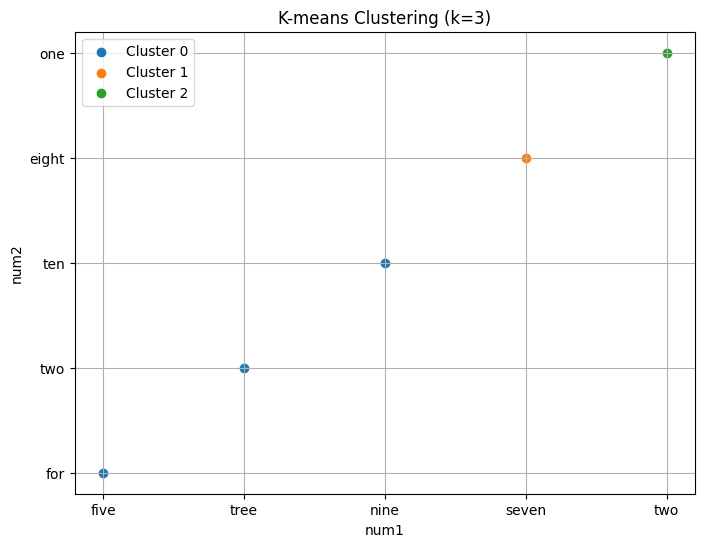

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a DataFrame from the given data
data = {
    'num1': ['two', 'five', 'tree', 'nine', 'seven'],
    'num2': ['one', 'for', 'two', 'ten', 'eight'],
    'num3': ['2', '5', '3', '9', '7'],
    'num4': ['1', '4', '2', '10', '8']
}
df = pd.DataFrame(data)

# Perform one-hot encoding on the categorical data
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df[['num1', 'num2']])

# Standardize the one-hot encoded data
scaler = StandardScaler(with_mean=False)
df_scaled = scaler.fit_transform(df_encoded)

print(df_scaled)

# Determine the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow method, select the optimal value of k (e.g., k=3 in this case)
optimal_k = 3

# Perform K-means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster_num in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['num1'], cluster_data['num2'], label=f'Cluster {cluster_num}')

plt.xlabel('num1')
plt.ylabel('num2')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()
